# Chordify

**"Chordify"** is a madeup word that we created in *music21* for the process of making chords out of non-chords

In [1]:
from music21 import *

reducing a complex score with multiple parts to a **succession of chords** in one part that represent everything that is happening in the score

In [2]:
b = corpus.parse('bwv66.6')
b.show('xml')

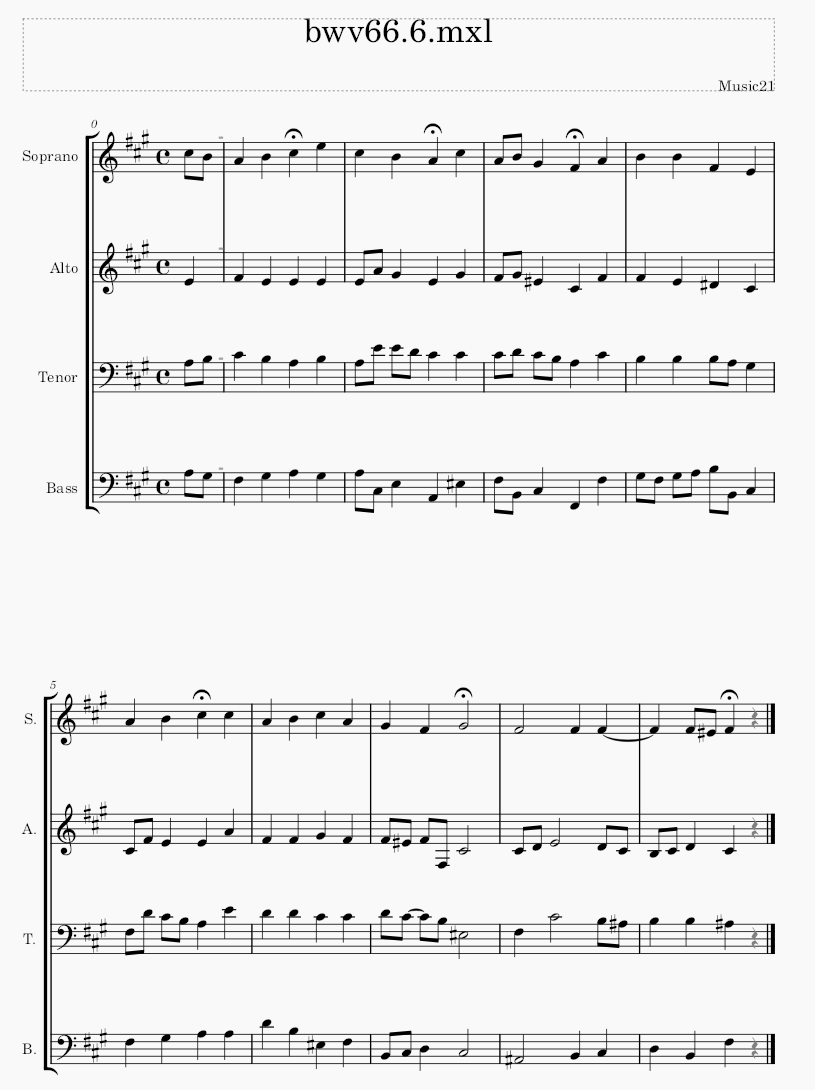

In [3]:
bChords = b.chordify()
bChords.show('xml')

Every note in the score is now represented in a single chord

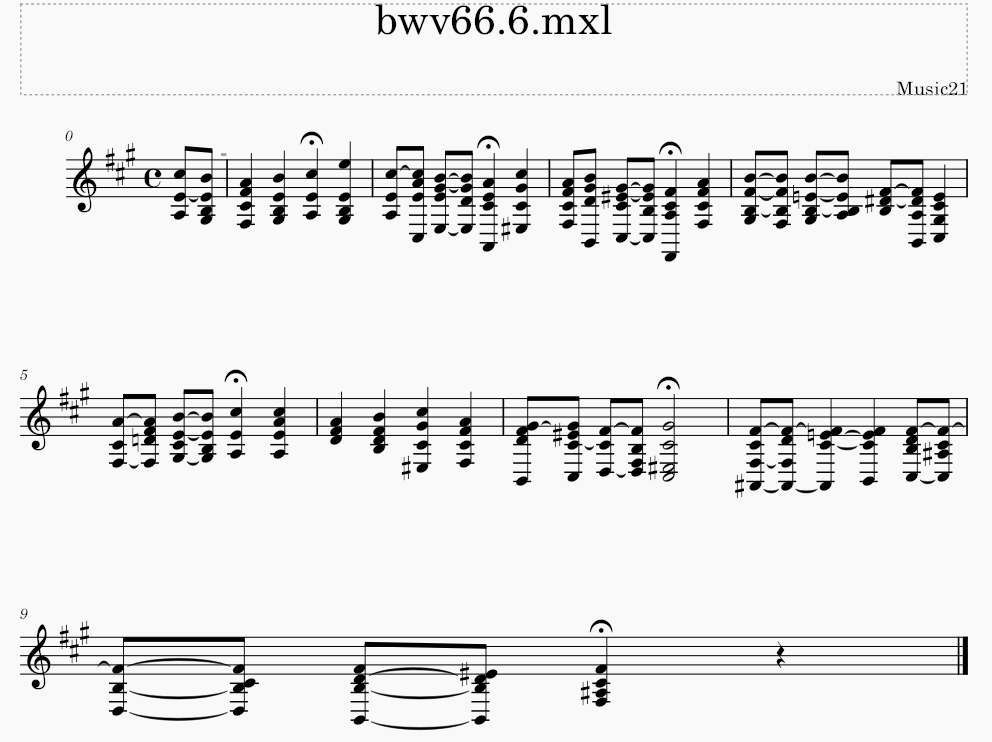

 check if there are any (fully-notated) dominant seventh chords in the piece

In [4]:
for thisChord in bChords.recurse().getElementsByClass('Chord'):
    if thisChord.isDominantSeventh():
        print(thisChord.measureNumber, thisChord.beatStr, thisChord)

2 2 1/2 <music21.chord.Chord E3 D4 G#4 B4>
3 2 1/2 <music21.chord.Chord C#3 B3 E#4 G#4>
4 3 1/2 <music21.chord.Chord B2 A3 D#4 F#4>
8 2 <music21.chord.Chord A#2 C#4 E4 F#4>


put **the chordified version** in the whole score

In [5]:
b.insert(0, bChords)
b.measures(0, 4).show('xml')

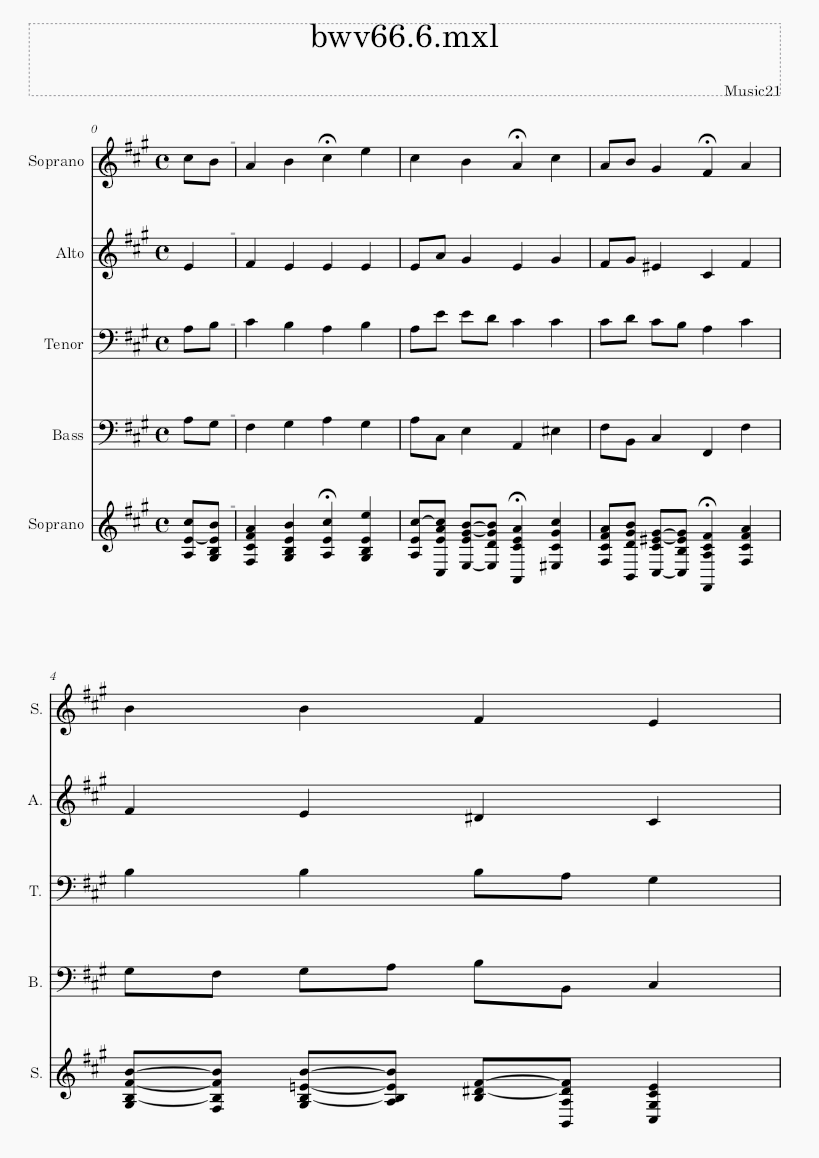

That’s a bit messy to read, so let’s put all these chords in ***closedPosition***

In [7]:
for c in bChords.recurse().getElementsByClass('Chord'):
    c.closedPosition(forceOctave=4, inPlace=True)

b.measures(0, 2).show('xml')

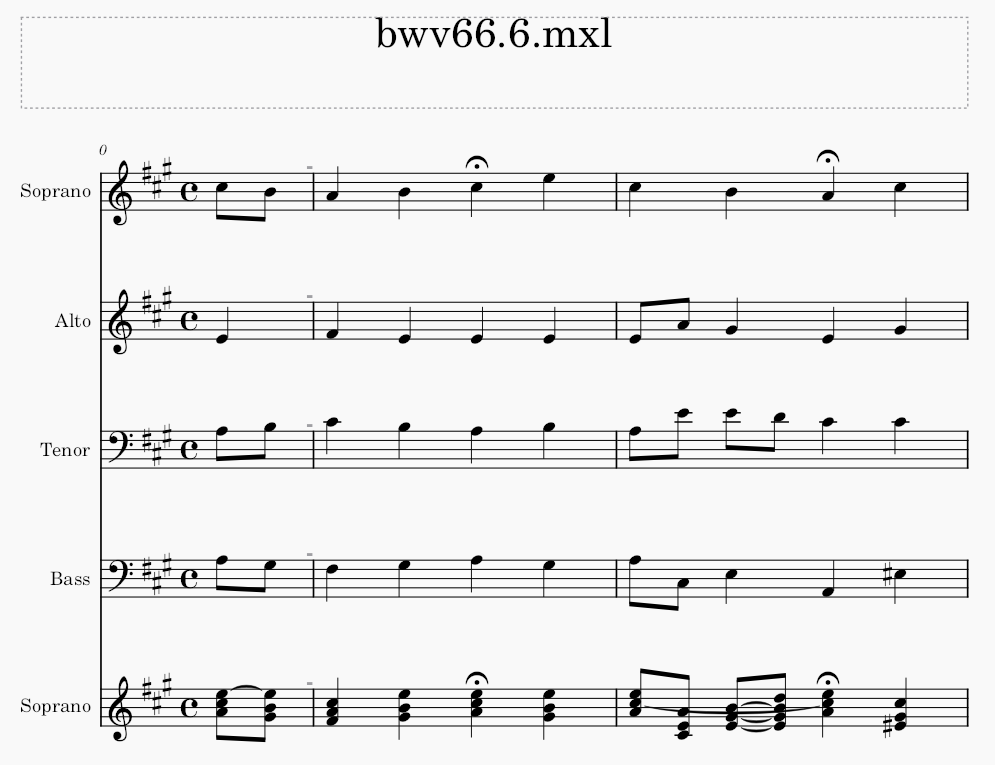

use the function *roman.romanNumeralFromChord* to label each of the chordified Chords as lyrics format

In [8]:
for c in bChords.recurse().getElementsByClass('Chord'):
    rn = roman.romanNumeralFromChord(c, key.Key('A'))
    c.addLyric(str(rn.figure))

b.measures(0, 2).show('xml')

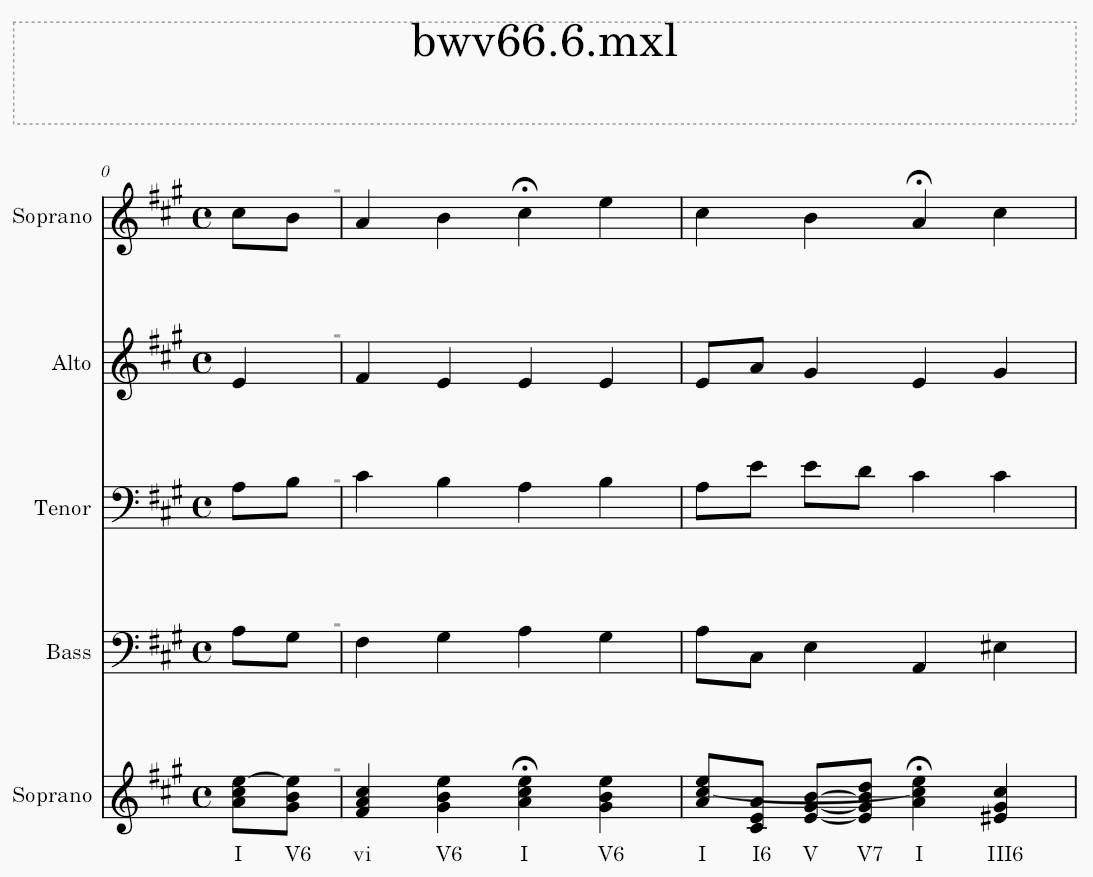

In [9]:
bChords.measures(0, 2).show('text')
# We can also see everything directly

{0.0} <music21.instrument.Instrument 'P1: Soprano: Instrument 1'>
{0.0} <music21.stream.Measure 0 offset=0.0>
    {0.0} <music21.clef.TrebleClef>
    {0.0} <music21.key.Key of f# minor>
    {0.0} <music21.meter.TimeSignature 4/4>
    {0.0} <music21.chord.Chord A4 C#5 E5>
    {0.5} <music21.chord.Chord G#4 B4 E5>
{1.0} <music21.stream.Measure 1 offset=1.0>
    {0.0} <music21.chord.Chord F#4 A4 C#5>
    {1.0} <music21.chord.Chord G#4 B4 E5>
    {2.0} <music21.chord.Chord A4 C#5 E5>
    {3.0} <music21.chord.Chord G#4 B4 E5>
{5.0} <music21.stream.Measure 2 offset=5.0>
    {0.0} <music21.chord.Chord A4 C#5 E5>
    {0.5} <music21.chord.Chord C#4 E4 A4>
    {1.0} <music21.chord.Chord E4 G#4 B4>
    {1.5} <music21.chord.Chord E4 G#4 B4 D5>
    {2.0} <music21.chord.Chord A4 C#5 E5>
    {3.0} <music21.chord.Chord E#4 G#4 C#5>


In [10]:
# extract the lyrics, where we stored the RomanNumeral information

for c in bChords.measures(0, 2).recurse():
    if 'Chord' not in c.classes:
        continue
    print(c.lyric, end=' ')

I V6 vi V6 I V6 I I6 V V7 I III6 

## Using Chordify to Annotate Intervals

Omitted here.

## Chordify and advanced scores

More complex scores can also be chordified

In [11]:
schoenberg = corpus.parse('schoenberg/opus19', 6)
schoenberg.show('xml')

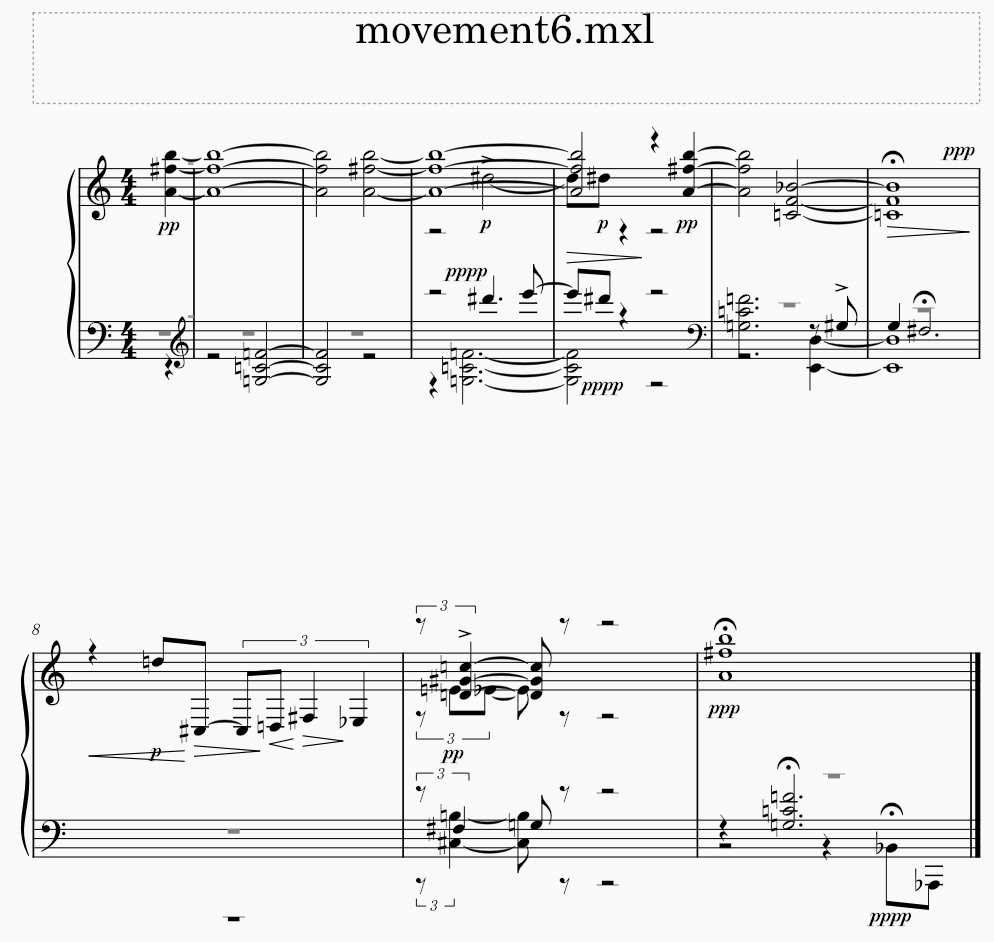

In [12]:
chorded = schoenberg.chordify()
chorded.show('xml')

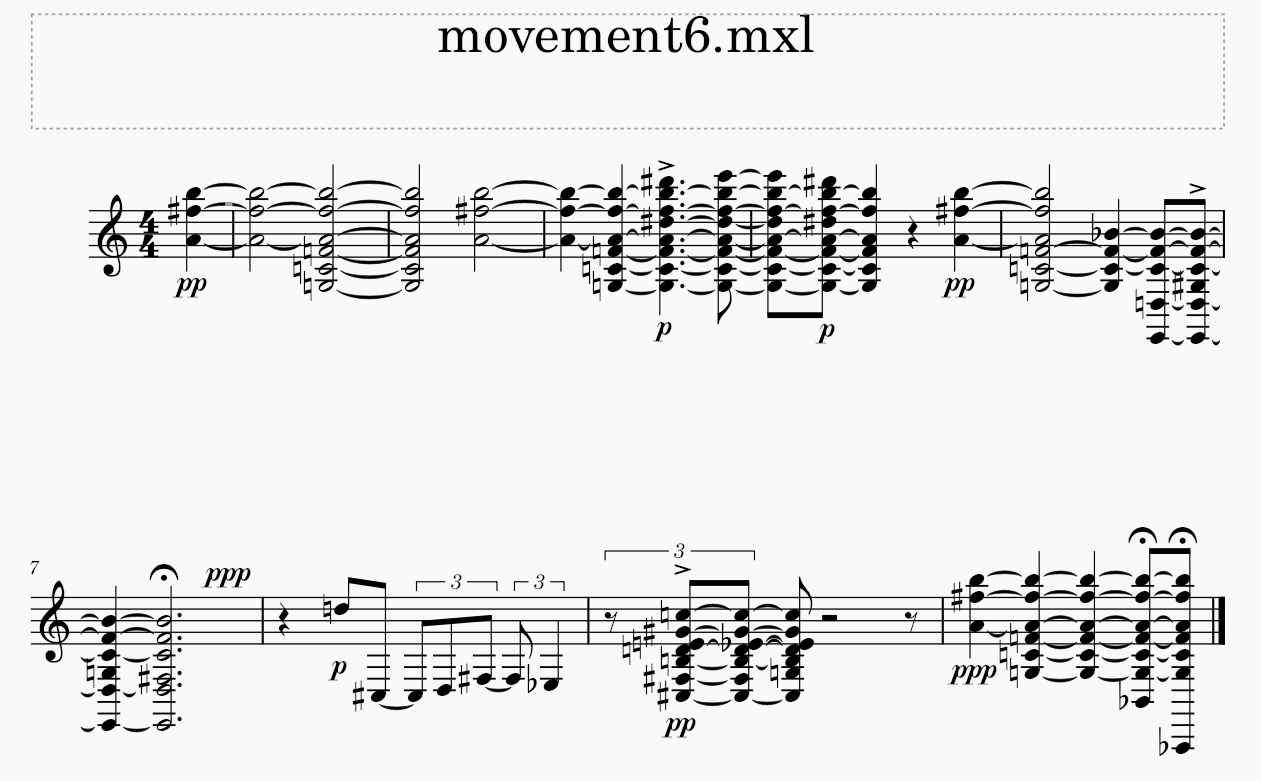